In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from helpers import plots, utils
import scipy

# The simplicity underlying common tests

https://lindeloev.github.io/tests-as-linear/

# Pearson and Spearman Correlation

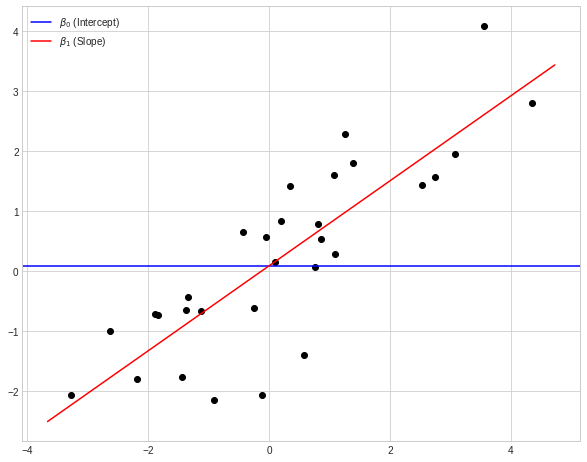

In [3]:
plots.linear_regression_plot()
plt.show()

This is often simply called a regression model which can be extended to multiple regression where there are several $\beta s$ and on the right-hand side multiplied with the predictors. **Everything bellow, from one-sample t-test to two-way ANOVA** are just special cases of the system.

Spearman rank correlation is a Pearson correlation on rank-transformed x and y.

$rank(y)=\beta_{0} + \beta_{1}\cdot rank(x)$

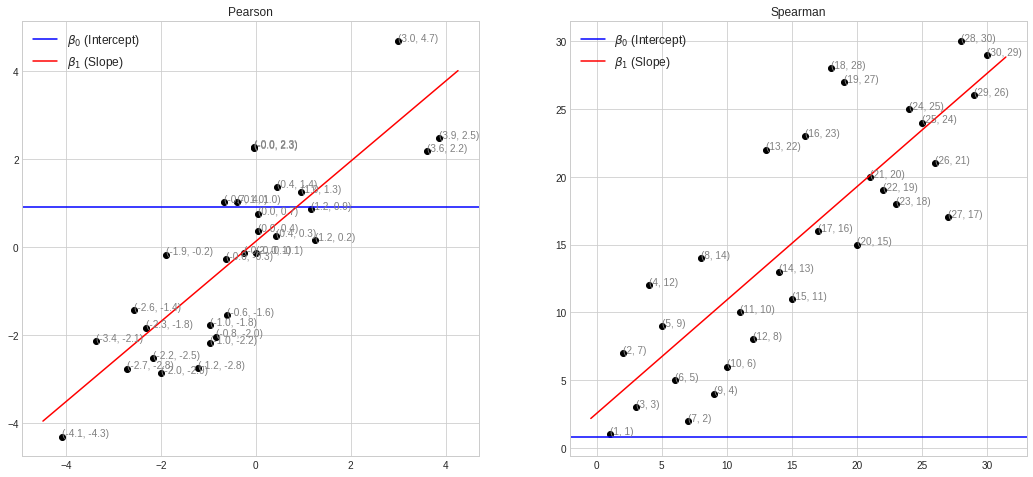

In [4]:
plots.pearson_spearman_plot()
plt.show()

## Theory: rank-transformation

`scipy.stats.rankdata` simply takes an array of numbers and "replaces" them with the integers of their rank. 

In [9]:
df = pd.DataFrame({"values": [1, 2, 34, -22, 5], "more_values": [33, 2, 22, 12, 5]})

In [10]:
# this is the ranked version of the dataset
df.rank()

,values,more_values
0,2.0,5.0
1,3.0,1.0
2,5.0,4.0
3,1.0,3.0
4,4.0,2.0


The problem with this approach is that we have a negative value been placed on a positive rank. Lets build a signed rank.

In [11]:
def signed_rank(df: pd.DataFrame):
    return np.sign(df) * df.abs().rank()

Ranks are easy, and yet it's all you need to do to convert most parametric tests into their non-parametric counterparts! Many "non-parametric tests" are about as parametric as their parametric counterparts with means, standard deviations, homogeneity of variance, etc. - just on rank-transformed data. That's why I put "non-parametric" in quotation.

In [12]:
signed_rank(df)

,values,more_values
0,1.0,5.0
1,2.0,1.0
2,5.0,4.0
3,-4.0,3.0
4,3.0,2.0


## Pearson Correlation

`smf.ols` gives you the **slope** and even though that is usuallu much more interpretable and informative than the correlation coefficient.
Yet, another information that is present on `smf.ols` is the **confidence interval**.

In [3]:
correlated = pd.DataFrame()
correlated["x"] = np.linspace(0, 1)
correlated["y"] = 1.5 * correlated.x + 2 * np.random.randn(len(correlated.x))

scaled = correlated / correlated.std()

r, p = scipy.stats.pearsonr(correlated["x"], correlated["y"])
res1 = smf.ols(formula="y ~ 1 + x", data=correlated).fit()
res2 = smf.ols(formula="y ~ 1 + x", data=scaled).fit()

In [5]:
utils.tabulate_results([r, p, None, None, None],
                        [res1, res2], 
                        ["scipy.stats.pearsonr", "smf.ols", "smf.ols (scaled)"])

,value,p-values,t-values,0.025 CI,0.975 CI
scipy.stats.pearsonr,0.264168,0.06377,NaN,NaN,NaN
smf.ols,1.654735,0.06377,1.897619,-0.098550,3.408020
smf.ols (scaled),0.264168,0.06377,1.897619,-0.015733,0.544069


The takeways is the **pearson correlations are equivalent to simple linear models**, the same p-value. The correlation number will be the same when used scaled (divided by the std) values of x and y.

The **spearman correlation is equivalent to a ranked linear model**.

## One Mean

### One sample t-test and Wilcoxon signed-rank

Is a nonparametric statistical test that compares two paired groups. The test essentially calculate the difference between sets of pairs and analyze these differences to establish if they are statistically significant.

#### As linear models

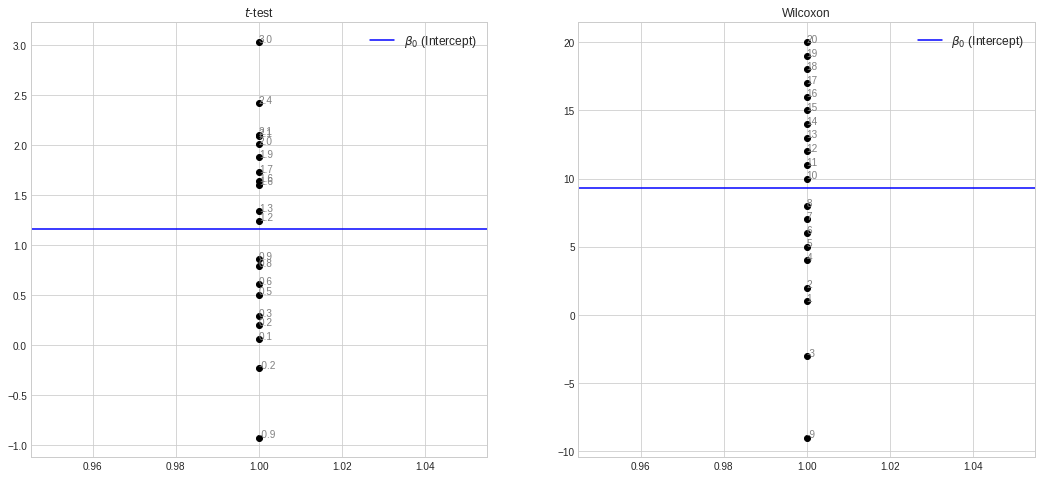

In [6]:
plots.ttest_wilcoxon_plot()
plt.show()

In [14]:
# example data: creating random normal variables
data = pd.DataFrame()
data["x"] = np.random.normal(loc=0.0, scale=1.0, size=50)
data["y"] = np.random.normal(loc=0.5, scale=1.0, size=50)
data["y2"] = np.random.normal(loc=0.8, scale=1.0, size=50)
data["y_sub_y2"] = data["y"] - data["y2"]
data

,x,y,y2,y_sub_y2
0,1.094630,0.779713,2.058189,-1.278476
1,-0.864414,2.821633,1.139977,1.681656
2,-1.319860,1.255500,-0.231494,1.486994
3,0.695635,2.219491,0.667005,1.552486
4,0.141546,-0.390393,0.509193,-0.899586
5,-0.751497,0.677038,1.313486,-0.636448
6,0.751416,0.983302,2.404294,-1.420993
7,1.645527,-0.468794,-0.149991,-0.318803
8,-0.646994,-0.585464,0.158718,-0.744182
9,-1.178695,0.204524,0.787752,-0.583229


### One sample t-test

Will see here that one sample t-test is equivalent to a simple linear regression, with the same t, p and r.

In [15]:
t, p = scipy.stats.ttest_1samp(data.y, 0)
res = smf.ols(formula="y ~ 1", data=data).fit()

In [16]:
utils.tabulate_results([None, p, t, None, None],
                       res,
                       ["scipy.stats.ttest_1samp", "smf.ols (y ~ 1)"],
                       coeff="Intercept")

,value,p-values,t-values,0.025 CI,0.975 CI
scipy.stats.ttest_1samp,NaN,0.005998,2.872789,NaN,NaN
smf.ols (y ~ 1),0.476042,0.005998,2.872789,0.143041,0.809044


### Wilcoxon signed-rank test

In [17]:
signed_rank_data = utils.signed_rank(data)

_, p = scipy.stats.wilcoxon(data.y)
res = smf.ols("y ~ 1", data=signed_rank_data).fit()

In [18]:
utils.tabulate_results([None, p, None, None, None],
                       res,
                       ["scipy.stats.wilcoxon", "smf.ols (y ~ 1, signed rank)"],
                       coeff="Intercept")

,value,p-values,t-values,0.025 CI,0.975 CI
scipy.stats.wilcoxon,NaN,0.005515,NaN,NaN,NaN
"smf.ols (y ~ 1, signed rank)",11.5,0.004389,2.987121,3.763415,19.236585


This is not exactly the same p-values, but it is very close.

## Paired samples t-test and Wilcoxon matched pairs 

### What is Paired Samples and Independent Samples?

Paired samples => Dependent samples

Paired samples ara samples in which natural or matched couplings occur. This generates a data set in which each data point in one sample is uniquely paired to a data point in the second sample.

Examples:

- pre-test/post-test in which a factor is measured before and after an intervention
- cross-over trials in which individuals are randomized to two treatments and then the same individuals are crossed-over to the alternative treatment.
- any circumstance in which each data point in one sample is uniquely matched to a data point in the second sample.

The "opposite" of paired samples is independent samples. **Independent samples consider unrelated groups**.